## Setup

### Imports

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Notebook settings

In [157]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style='white', palette='Blues_r')

### Functions

In [138]:
#plot boxplot
def boxplot_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, ticks=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

# plot scatterplot
def scatter_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

# plot timeseries plot
def timeseries_plot(df, x, xlabel, y, ylabel, color='blue', target_var=False, existing_ax=None):
    if target_var == True:
        color = 'black'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    sns.lineplot(df, x=x, y=y, color=color, label=y)
    ax.set(title=f"{ylabel} over time", xlabel=xlabel, ylabel=ylabel, label=y.replace("_"," "))
    plt.legend(loc='best')

# function for adf test
def dickeyFullerTest(df):
    for column in df.columns:
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')




from mpl_toolkits.axes_grid1 import host_subplot

# plot duel times series
def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1="blue", color2="black"):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()


# annotate and vertical or horizontal line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, horizontal_line = False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if horizontal_line:
        plt.axhline(y, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)


# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()


# # Histogram and boxplot (and skew output)
# def den_hist_boxplot(data, features, bins, target_var=False, color='blue'):
#     for col in features:
#         if target_var == True:
#             color = 'black'
#     print(f'{col} skew: {round(data[col].skew(), 2)}')
#     plt.figure(figsize = (15,5))
#     plt.subplot(1, 2, 1)
#     sns.histplot(data = data, data[col], bins=bins, stat='density', kde=True, color=color)
#     plt.xticks(rotation=90)
#     plt.ticklabel_format(style='plain')
#     plt.title(f'Density Histogram of {col}')
#     plt.subplot(1, 2, 2)
#     sns.boxplot(data = data, x=data[col], color=color)
#     plt.title(f'Boxplot of {col}')
#     plt.xticks(rotation=90)


# Histogram
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', target_var=False, xrange=None, yrange=None):
    if target_var == True:
        color = 'black'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color)
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);

# Multiple annotation on a graph with arrow
def annotate_graph (text, xdate, y, xtext, ytext):
    plt.annotate(text, xy =((pd.to_datetime(xdate)), y), xytext =(pd.to_datetime(xtext), ytext),  
                arrowprops = dict(facecolor = 'blue', shrink = 0.05, headwidth = 7, headlength = 7),
                fontsize= 8)

# Correlation heatmap
def correlation_heat_map(df, title, method="pearson", vmin=-1, vmax=1):
    col_names = [col.replace("_", " ") for col in df.columns]
    ax = sns.heatmap(df.corr(method=method), annot=True, fmt=".2f", xticklabels=col_names, yticklabels=col_names, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set(title=title)

# Barplot
def barplot_(df, x, y, title, xlabel, ylabel, errorbar=None, estimator='sum', hue=None, containers = True, figwidth = 10, figheight = 5, order=None):
    fig, ax = plt.subplots(figsize = (figwidth,figheight))
    ax = sns.barplot(df, x=x, y=y, errorbar=errorbar, estimator=estimator, hue=hue, order=order)
    ax.set_title(title)
    if containers == True:
        for bars in ax.containers:
            ax.bar_label(bars)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return fig
    
# Average wait for weeks wait dataframe printed
def average_wait_(df):
    for row in df:
        row_total = df['count_of_diagnostics_id'] * df['current_wait_band']
    average_wait = (row_total.sum() / df['count_of_diagnostics_id'].sum()).round(2)
    print(f'Average wait per patient is: {average_wait} weeks');

# Average wait for weeks wait dataframe value only
def average_wait_val_(df):
    for row in df:
        row_total = df['count_of_diagnostics_id'] * df['current_wait_band']
    average_wait = (row_total.sum() / df['count_of_diagnostics_id'].sum()).round(2)
    return average_wait

## Reading in data

In [47]:
df_weeks_wait = pd.read_csv('../05.output/actual/weeks_wait.csv', index_col='Unnamed: 0')
df_weeks_wait_all = pd.read_csv('../05.output/actual/weeks_wait_all.csv', index_col='Unnamed: 0')

In [169]:
df_weeks_wait_all.nunique()

diagnostic_sub_category     19
diagnostic_description     526
count_of_diagnostics_id    112
current_wait_band          100
dtype: int64

## Univariate Analysis

### CT only

In [48]:
df_weeks_wait.head()

,diagnostic_sub_category,diagnostic_description,count_of_diagnostics_id,current_wait_band,is_breach
0,CT,CT Abdomen,6,0,N
1,CT,CT Abdomen,2,1,N
2,CT,CT Abdomen,7,2,N
3,CT,CT Abdomen,3,3,N
4,CT,CT Abdomen,7,4,N


In [166]:
df_weeks_wait.columns

Index(['diagnostic_sub_category', 'diagnostic_description',
       'count_of_diagnostics_id', 'current_wait_band', 'is_breach'],
      dtype='object')

In [49]:
# Creating dataframe with only CT diagnostic
df_weeks_wait_CT = df_weeks_wait[df_weeks_wait['diagnostic_sub_category']=='CT'].copy()
df_weeks_wait_CT.head()

,diagnostic_sub_category,diagnostic_description,count_of_diagnostics_id,current_wait_band,is_breach
0,CT,CT Abdomen,6,0,N
1,CT,CT Abdomen,2,1,N
2,CT,CT Abdomen,7,2,N
3,CT,CT Abdomen,3,3,N
4,CT,CT Abdomen,7,4,N


In [50]:
df_weeks_wait_CT.describe()

# number of patients for each instance range form 1 to 232, mean 9.8
# weeks wait ranges from 0 to 45 weeks, mean 6.9 weeks

,count_of_diagnostics_id,current_wait_band
count,703.000000,703.000000
mean,9.755334,6.883357
std,18.507945,5.508661
min,1.000000,0.000000
25%,3.000000,3.000000
50%,5.000000,6.000000
75%,8.000000,9.000000
max,232.000000,45.000000


In [51]:
df_weeks_wait_CT['count_of_diagnostics_id'].sum()

6858

In [52]:
# Summary of number of patients in each wait band
df_weeks_wait_CT.groupby(['current_wait_band'])['count_of_diagnostics_id'].sum()

current_wait_band
0      164
1     1356
2     1103
3      794
4      460
      ... 
22      36
23      16
25       1
26       3
45       3
Name: count_of_diagnostics_id, Length: 27, dtype: int64

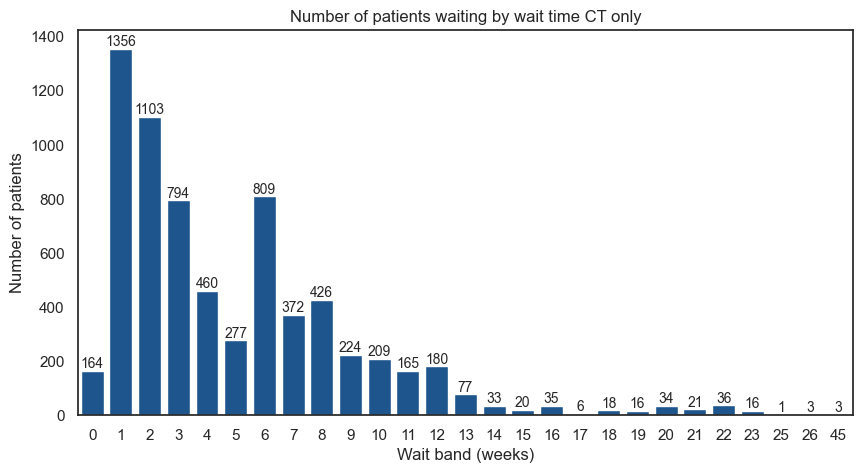

In [83]:
# Plot of wait band against number of people CT only
barplot_(df_weeks_wait_CT, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time CT only',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients')

In [54]:
df_weeks_wait_CT.groupby(['current_wait_band'])['count_of_diagnostics_id'].describe()

,count,mean,std,min,25%,50%,75%,max
current_wait_band,,,,,,,,
0,26.0,6.307692,4.806406,2.0,3.25,5.0,7.75,25.0
1,69.0,19.652174,35.697597,1.0,4.00,6.0,15.00,232.0
2,71.0,15.535211,30.694732,1.0,3.00,6.0,9.00,207.0
3,67.0,11.850746,20.067503,1.0,3.50,6.0,8.50,138.0
4,45.0,10.222222,13.048666,1.0,4.00,6.0,12.00,77.0
...,...,...,...,...,...,...,...,...
22,8.0,4.500000,2.449490,2.0,3.00,3.0,6.50,8.0
23,4.0,4.000000,1.154701,3.0,3.00,4.0,5.00,5.0
25,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0


In [55]:
df_weeks_wait_CT['count_of_diagnostics_id'].sum()

6858

In [56]:
df_weeks_wait_ct_breach = df_weeks_wait_CT.groupby(['is_breach'])['count_of_diagnostics_id'].sum()

In [57]:
df_weeks_wait_CT.columns

Index(['diagnostic_sub_category', 'diagnostic_description',
       'count_of_diagnostics_id', 'current_wait_band', 'is_breach'],
      dtype='object')

In [58]:
df_weeks_wait_CT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   diagnostic_sub_category  703 non-null    object
 1   diagnostic_description   703 non-null    object
 2   count_of_diagnostics_id  703 non-null    int64 
 3   current_wait_band        703 non-null    int64 
 4   is_breach                703 non-null    object
dtypes: int64(2), object(3)
memory usage: 33.0+ KB


In [59]:
# Calculating the average wait per patient CT scans only
average_wait_(df_weeks_wait_CT)


Average wait per patient is: 4.91 weeks


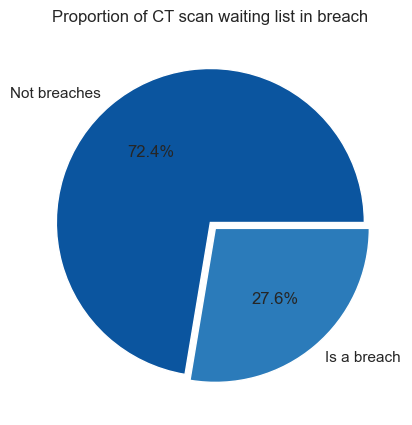

In [60]:
explode = (0,0.05)
fig, ax = plt.subplots(figsize = (5,5))
labels= ['Not breaches', 'Is a breach']
ax.pie(df_weeks_wait_ct_breach, labels = labels, autopct='%1.1f%%', explode = explode)
ax.set_title('Proportion of CT scan waiting list in breach');

### Comments CT only
- 6858 patients on the waiting list for CT scans
- 1895 patients have been waiting for more than 6 weeks so are classified as breaches
- 27.6% of patients on the waiting list for CT scans are breaches
- Average wait per patient is: 4.91 weeks

### CT cardiac only

In [61]:
# Creating dataframe with only CT cardiac diagnostic
df_weeks_wait_CT_cardiac = df_weeks_wait[df_weeks_wait['diagnostic_sub_category']=='CT Cardiac'].copy()
df_weeks_wait_CT_cardiac.head(2)

,diagnostic_sub_category,diagnostic_description,count_of_diagnostics_id,current_wait_band,is_breach
703,CT Cardiac,CT Angiography for TAVI workup,4,1,N
704,CT Cardiac,CT Angiography for TAVI workup,6,2,N


In [62]:
df_weeks_wait_CT_cardiac['diagnostic_sub_category'].value_counts()

diagnostic_sub_category
CT Cardiac    50
Name: count, dtype: int64

In [63]:
df_weeks_wait_CT_cardiac.describe() 

# number of patients for each instance range form 1 to 37, mean 9.62
# weeks wait ranges from 1 to 50 weeks, mean 16.4 weeks

,count_of_diagnostics_id,current_wait_band
count,50.00000,50.000000
mean,9.62000,16.440000
std,8.33456,11.187019
min,1.00000,1.000000
25%,4.00000,7.250000
50%,6.00000,15.500000
75%,14.00000,23.750000
max,37.00000,50.000000


In [64]:
# Summary of number of patients in each wait band
df_weeks_wait_CT_cardiac.groupby(['current_wait_band'])['count_of_diagnostics_id'].sum()

current_wait_band
1     39
2     27
3     18
4     16
5      8
      ..
31     6
32     2
37     3
42     6
50     4
Name: count_of_diagnostics_id, Length: 35, dtype: int64

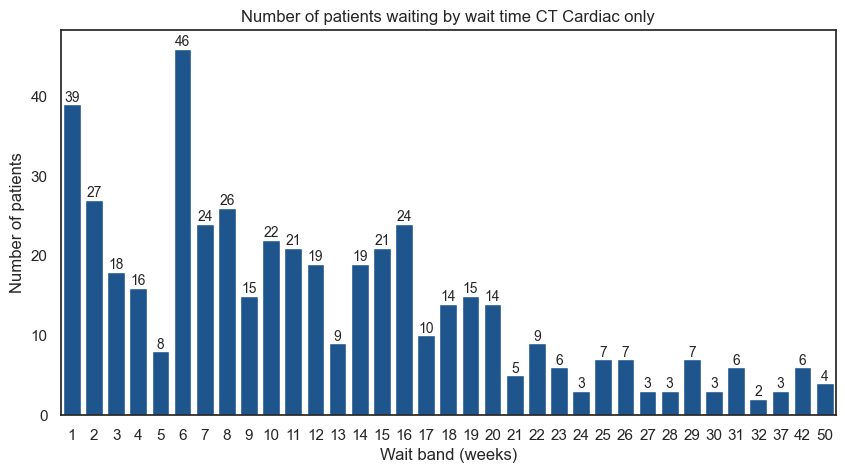

In [65]:
# Plot of wait band against number of people CT Cardiac only
barplot_(df_weeks_wait_CT_cardiac, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time CT Cardiac only',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients')

In [66]:
# determining the average 
df_weeks_wait_CT_cardiac['current_wait_band'].describe()

count    50.000000
mean     16.440000
std      11.187019
min       1.000000
25%       7.250000
50%      15.500000
75%      23.750000
max      50.000000
Name: current_wait_band, dtype: float64

In [67]:
df_weeks_wait_CT_cardiac.groupby(['current_wait_band'])['count_of_diagnostics_id'].describe()

,count,mean,std,min,25%,50%,75%,max
current_wait_band,,,,,,,,
1,2.0,19.5,21.920310,4.0,11.75,19.5,27.25,35.0
2,2.0,13.5,10.606602,6.0,9.75,13.5,17.25,21.0
3,1.0,18.0,NaN,18.0,18.00,18.0,18.00,18.0
4,2.0,8.0,5.656854,4.0,6.00,8.0,10.00,12.0
5,1.0,8.0,NaN,8.0,8.00,8.0,8.00,8.0
...,...,...,...,...,...,...,...,...
31,1.0,6.0,NaN,6.0,6.00,6.0,6.00,6.0
32,1.0,2.0,NaN,2.0,2.00,2.0,2.00,2.0
37,1.0,3.0,NaN,3.0,3.00,3.0,3.00,3.0


In [68]:
# Calculating the average wait per patient CT scans only
average_wait_(df_weeks_wait_CT_cardiac)

Average wait per patient is: 12.32 weeks


In [69]:
df_weeks_wait_CT_cardiac['count_of_diagnostics_id'].sum()

481

In [70]:
df_weeks_wait_ct_cardiac_breach = df_weeks_wait_CT_cardiac.groupby(['is_breach'])['count_of_diagnostics_id'].sum()
df_weeks_wait_ct_cardiac_breach

is_breach
N    154
Y    327
Name: count_of_diagnostics_id, dtype: int64

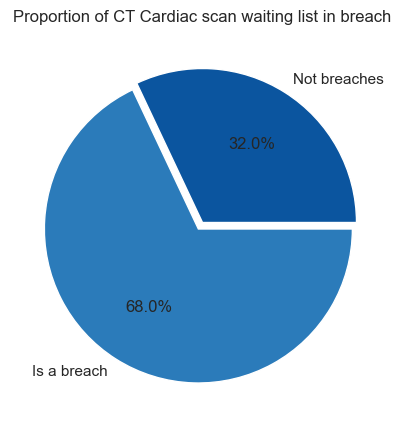

In [71]:
explode = (0,0.05)
fig, ax = plt.subplots(figsize = (5,5))
labels= ['Not breaches', 'Is a breach']
ax.pie(df_weeks_wait_ct_cardiac_breach, labels = labels, autopct='%1.1f%%', explode = explode)
ax.set_title('Proportion of CT Cardiac scan waiting list in breach');

### Comments Cardiac only
- 481 patients on the waiting list for CT Cardiac scans
- 327 patients have been waiting for more than 6 weeks so are classified as breaches
- 68% of patients on the waiting list for CT Cardiac scans are breaches
- Average wait per patient is: 12.32 weeks

### CT and CT cardiac combined

In [72]:
df_weeks_wait

,diagnostic_sub_category,diagnostic_description,count_of_diagnostics_id,current_wait_band,is_breach
0,CT,CT Abdomen,6,0,N
1,CT,CT Abdomen,2,1,N
2,CT,CT Abdomen,7,2,N
3,CT,CT Abdomen,3,3,N
4,CT,CT Abdomen,7,4,N
...,...,...,...,...,...
748,CT Cardiac,CT Cardiac Cor artery calcium scoring,1,11,Y
749,CT Cardiac,CT Cardiac Cor artery calcium scoring,6,12,Y
750,CT Cardiac,CT Cardiac Cor artery calcium scoring,1,19,Y
751,CT Cardiac,CT Cardiac Cor artery calcium scoring,3,22,Y


In [73]:
# Summary of number of patients in each wait band
df_weeks_wait.groupby(['current_wait_band'])['count_of_diagnostics_id'].sum()

current_wait_band
0      164
1     1395
2     1130
3      812
4      476
      ... 
32       2
37       3
42       6
45       3
50       4
Name: count_of_diagnostics_id, Length: 37, dtype: int64

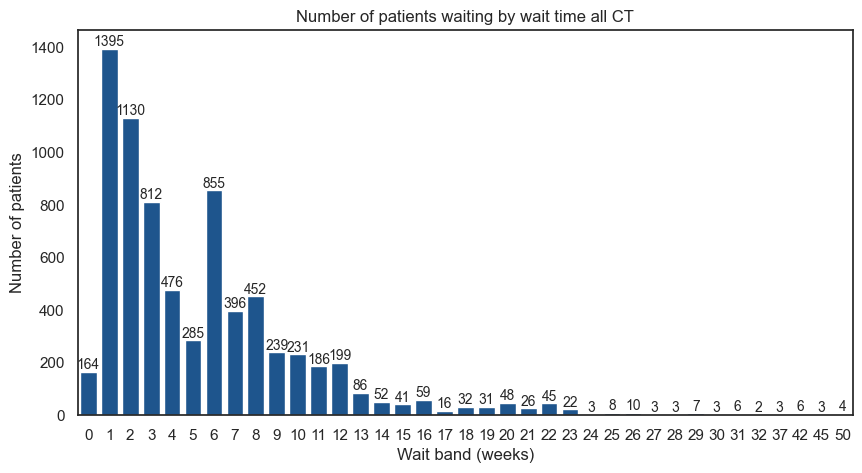

In [74]:
# Plot of wait band against number of people all CT
barplot_(df_weeks_wait, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time all CT',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients')

In [75]:
df_weeks_wait.groupby(['current_wait_band'])['count_of_diagnostics_id'].describe()

,count,mean,std,min,25%,50%,75%,max
current_wait_band,,,,,,,,
0,26.0,6.307692,4.806406,2.0,3.25,5.0,7.75,25.0
1,71.0,19.647887,35.281358,1.0,4.00,6.0,15.50,232.0
2,73.0,15.479452,30.293064,1.0,3.00,6.0,9.00,207.0
3,68.0,11.941176,19.931137,1.0,3.75,6.0,9.00,138.0
4,47.0,10.127660,12.797107,1.0,4.00,6.0,12.00,77.0
...,...,...,...,...,...,...,...,...
32,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
37,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
42,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0


In [76]:
# Calculating the average wait per patient CT scans only
average_wait_(df_weeks_wait)

Average wait per patient is: 5.4 weeks


In [77]:
df_weeks_wait['count_of_diagnostics_id'].sum()

7339

In [78]:
df_weeks_wait_breach = df_weeks_wait.groupby(['is_breach'])['count_of_diagnostics_id'].sum()
df_weeks_wait_breach

is_breach
N    5117
Y    2222
Name: count_of_diagnostics_id, dtype: int64

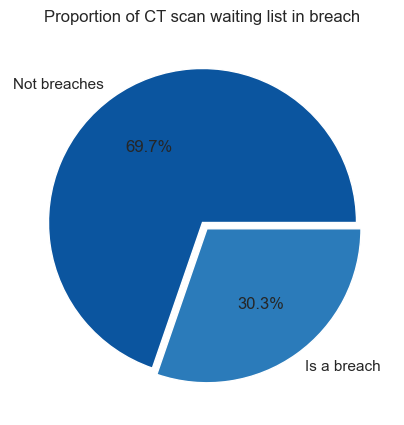

In [79]:
explode = (0,0.05)
fig, ax = plt.subplots(figsize = (5,5))
labels= ['Not breaches', 'Is a breach']
ax.pie(df_weeks_wait_breach, labels = labels, autopct='%1.1f%%', explode = explode)
ax.set_title('Proportion of CT scan waiting list in breach');

#### Comments all CT
- 7339 patients on the waiting list for CT scans
- 2222 patients have been waiting for more than 6 weeks so are classified as breaches
- 30.3% of patients on the waiting list for CT scans are breaches
- Average wait per patient is: 5.4 weeks

### Comparison of CT and CT Cardiac

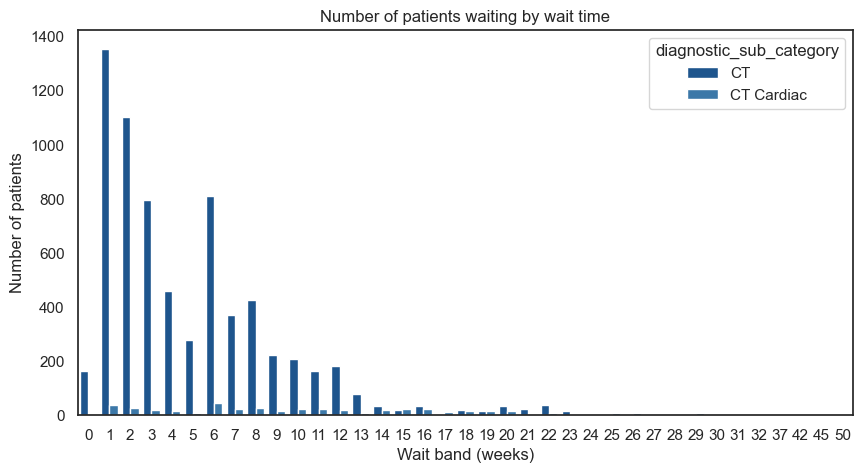

In [86]:
# comparing CT and CT Cardiac
# Plot of wait band against number of people all CT
barplot_(df_weeks_wait, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients',
         hue = 'diagnostic_sub_category',
        containers = False )

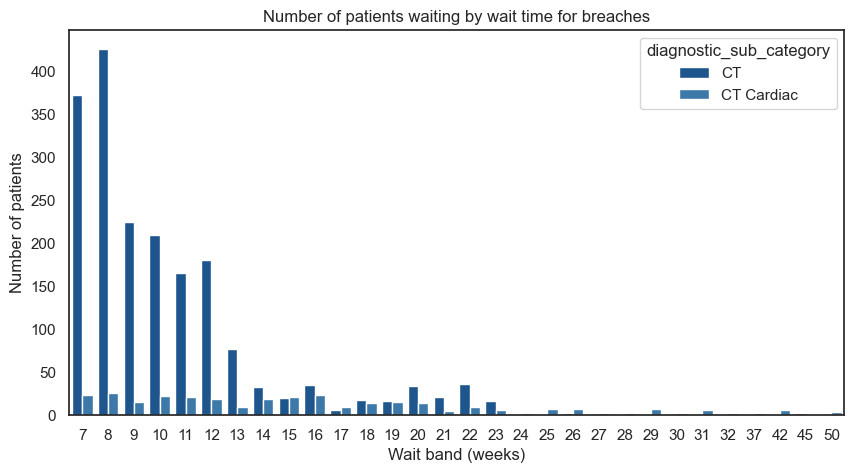

In [88]:
# comparing CT and CT Cardiac breaches only
# Plot of wait band against number of people all CT
df_weeks_wait_breaches_only = df_weeks_wait[df_weeks_wait['current_wait_band']>6]
barplot_(df_weeks_wait_breaches_only, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time for breaches',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients',
         hue = 'diagnostic_sub_category',
        containers = False )

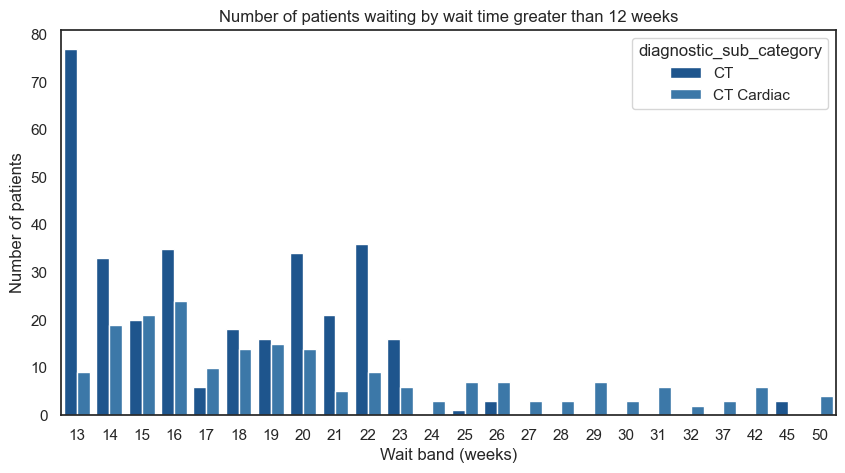

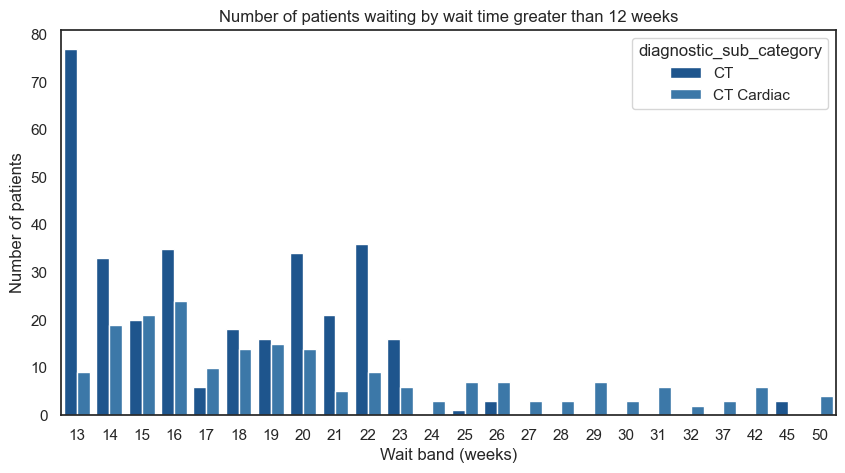

In [152]:
# comparing CT and CT Cardiac breaches only
# Plot of wait band against number of people all CT
df_weeks_wait_13= df_weeks_wait[df_weeks_wait['current_wait_band']>12]
barplot_(df_weeks_wait_13, x='current_wait_band', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time greater than 12 weeks',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients',
         hue = 'diagnostic_sub_category',
        containers = False )

In [89]:
df_weeks_wait_breaches_only.groupby(['diagnostic_sub_category'])['count_of_diagnostics_id'].sum()

diagnostic_sub_category
CT            1895
CT Cardiac     327
Name: count_of_diagnostics_id, dtype: int64

In [90]:
df_weeks_wait.groupby(['diagnostic_sub_category', 'is_breach'])['count_of_diagnostics_id'].sum()

diagnostic_sub_category  is_breach
CT                       N            4963
                         Y            1895
CT Cardiac               N             154
                         Y             327
Name: count_of_diagnostics_id, dtype: int64

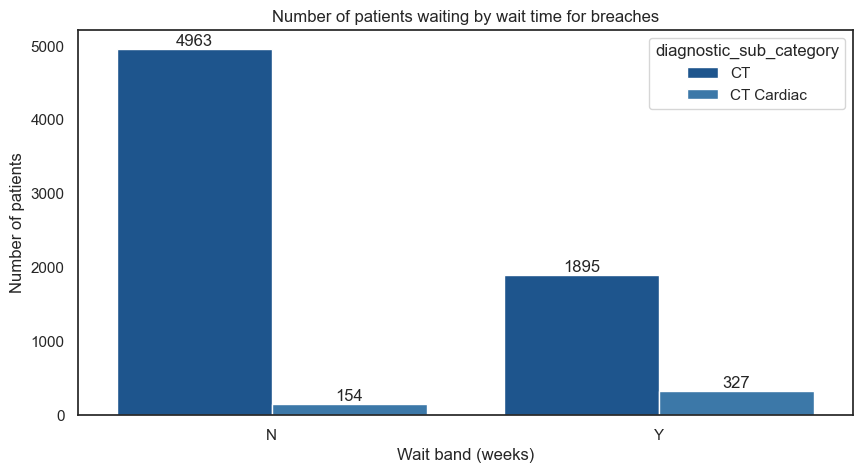

In [97]:
barplot_(df_weeks_wait, x='is_breach', y='count_of_diagnostics_id',
         title = 'Number of patients waiting by wait time for breaches',
         xlabel = 'Wait band (weeks)',
         ylabel = 'Number of patients',
         hue = 'diagnostic_sub_category',
         )


### Comparison by Modality

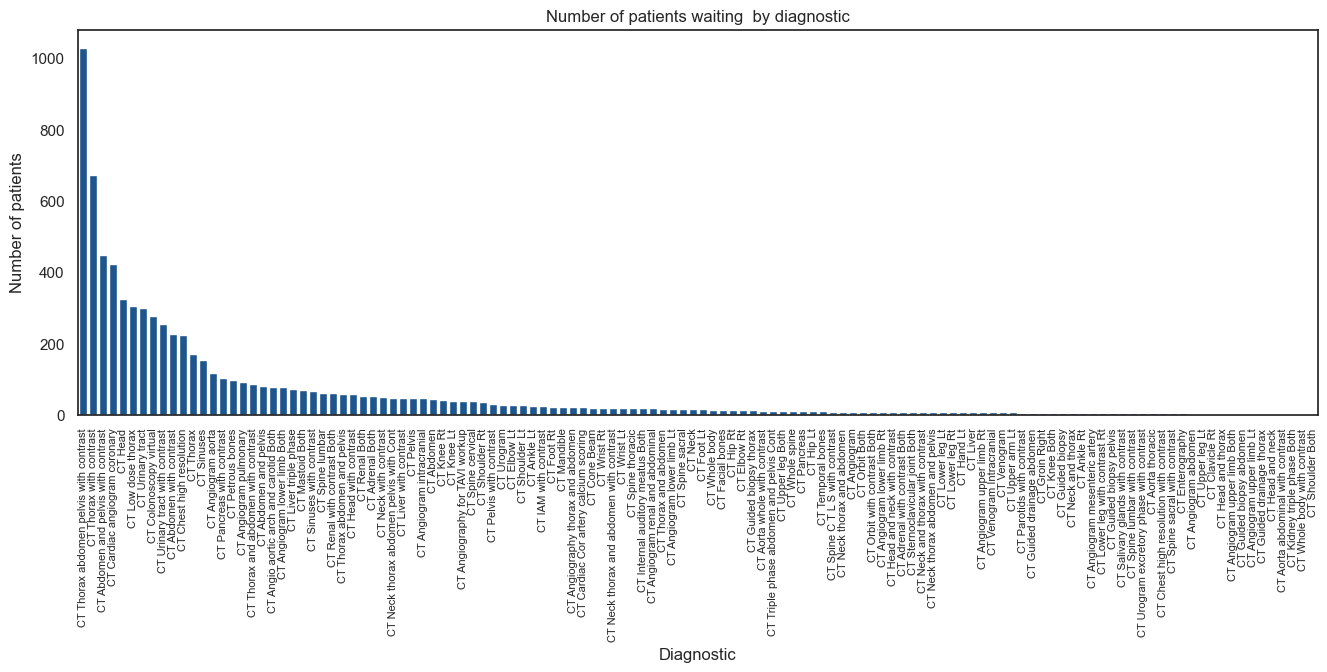

In [134]:
# Plot number of patients waiting by modality
order = df_weeks_wait.groupby(['diagnostic_description'])['count_of_diagnostics_id'].sum().sort_values(ascending = False).index

barplot_(df_weeks_wait, x='diagnostic_description', y='count_of_diagnostics_id',
         title = 'Number of patients waiting  by diagnostic',
         xlabel = 'Diagnostic',
         ylabel = 'Number of patients',
         containers = False,
         figwidth = 16,
         order=order
         )
# rotate text on tick marks
plt.xticks(rotation = 90, fontsize=8);

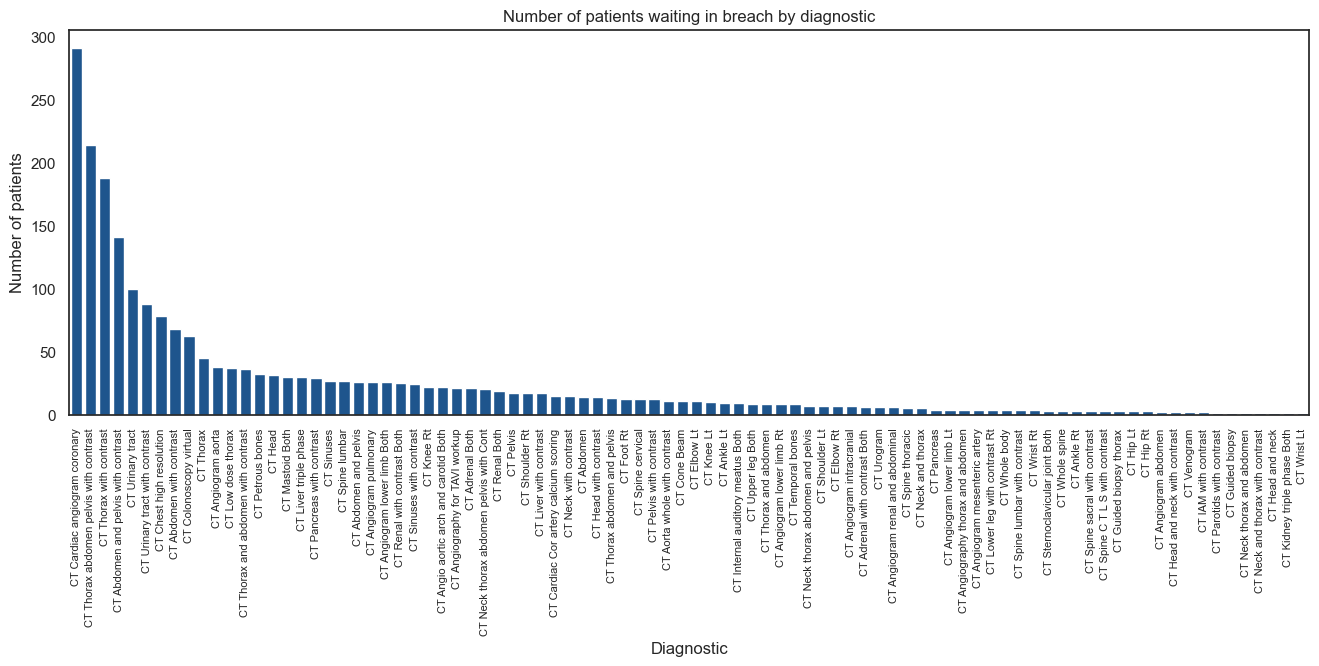

In [154]:
# Plot number of patients waiting in breach by modality
order_breach = df_weeks_wait_breaches_only.groupby(['diagnostic_description'])['count_of_diagnostics_id'].sum().sort_values(ascending = False).index

barplot_(df_weeks_wait_breaches_only, x='diagnostic_description', y='count_of_diagnostics_id',
         title = 'Number of patients waiting in breach by diagnostic',
         xlabel = 'Diagnostic',
         ylabel = 'Number of patients',
         containers = False,
         figwidth = 16,
         order=order_breach
         )
# rotate text on tick marks
plt.xticks(rotation = 90, fontsize=8);

In [158]:
df_weeks_wait_breaches_only.groupby(['diagnostic_description'])['count_of_diagnostics_id'].sum().sort_values(ascending = False)

diagnostic_description
CT Cardiac angiogram coronary             291
CT Thorax abdomen pelvis with contrast    214
CT Thorax with contrast                   188
CT Abdomen and pelvis with contrast       141
CT Urinary tract                          100
                                         ... 
CT Neck thorax and abdomen                  1
CT Neck and thorax with contrast            1
CT Head and neck                            1
CT Kidney triple phase Both                 1
CT Wrist Lt                                 1
Name: count_of_diagnostics_id, Length: 88, dtype: int64

### Wait time by modality

In [99]:
# Average wait all CT scans (including Cardiac)
# Calcualting average wait time for each CT diagnostic description
unique_descriptions = df_weeks_wait['diagnostic_description'].unique()
wait_times_by_desc = pd.DataFrame()
wait_times_by_desc['diagnostic_description'] = unique_descriptions
average_waits = []
patient_total = []
for desc in unique_descriptions:
    average_waits.append(average_wait_val_(df_weeks_wait[df_weeks_wait['diagnostic_description'] == desc ]))
    patient_total.append((df_weeks_wait[df_weeks_wait['diagnostic_description'] == desc ])['count_of_diagnostics_id'].sum())
wait_times_by_desc['patient_total'] = patient_total
wait_times_by_desc['average_wait_time'] = average_waits

wait_times_by_desc = wait_times_by_desc.sort_values(by=['average_wait_time'], ascending= False)

In [159]:
wait_times_by_desc[wait_times_by_desc['average_wait_time']>6] # 27 diagnostics
# wait_times_by_desc[wait_times_by_desc['average_wait_time']>7] # 19 disgnostics
# wait_times_by_desc[wait_times_by_desc['average_wait_time']>8] # 11
# wait_times_by_desc[wait_times_by_desc['average_wait_time']>9] # 8
# wait_times_by_desc[wait_times_by_desc['average_wait_time']>10] # 6

,diagnostic_description,patient_total,average_wait_time
54,CT Kidney triple phase Both,1,45.00
14,CT Angiogram mesenteric artery,4,14.00
123,CT Cardiac Cor artery calcium scoring,20,13.10
122,CT Cardiac angiogram coronary,422,12.70
70,CT Neck thorax abdomen and pelvis,7,11.71
...,...,...,...
53,CT Internal auditory meatus Both,17,6.47
104,CT Thorax and abdomen with contrast,85,6.44
79,CT Parotids with contrast,5,6.40
36,CT Foot Rt,22,6.36


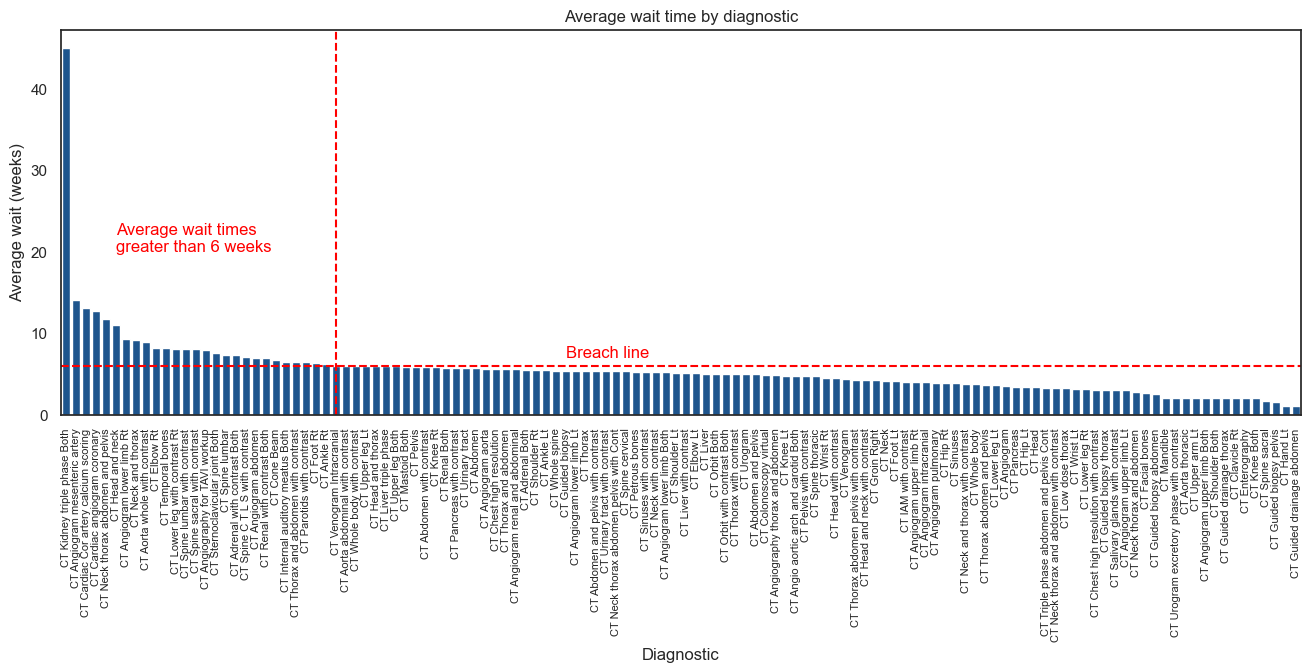

In [164]:
barplot_(wait_times_by_desc, x='diagnostic_description', y='average_wait_time',
         title = 'Average wait time by diagnostic',
         xlabel = 'Diagnostic',
         ylabel = 'Average wait (weeks)',
         containers = False,
         figwidth = 16
         )
# rotate text on tick marks
plt.xticks(rotation = 90, fontsize=8)
plt.annotate('Breach line', xy=(50, 7), color='red')
plt.annotate('Average wait times \ngreater than 6 weeks', xy=(5, 20), color='red')
;

annotate_and_line(x=27, y=6, color="red", linestyle="--", annotation=None, vertical_line=True, horizontal_line = True, time_series=False, annot_x=None)


In [136]:
# Average wait all CT scans (including Cardiac) BREACHES ONLY  df_weeks_wait_breaches_only
# Calcualting average wait time for each CT diagnostic description
unique_descriptions = df_weeks_wait_breaches_only['diagnostic_description'].unique()
wait_times_by_desc_breach = pd.DataFrame()
wait_times_by_desc_breach['diagnostic_description'] = unique_descriptions
average_waits = []
patient_total = []
for desc in unique_descriptions:
    average_waits.append(average_wait_val_(df_weeks_wait_breaches_only[df_weeks_wait_breaches_only['diagnostic_description'] == desc ]))
    patient_total.append((df_weeks_wait_breaches_only[df_weeks_wait_breaches_only['diagnostic_description'] == desc ])['count_of_diagnostics_id'].sum())
wait_times_by_desc_breach['patient_total'] = patient_total
wait_times_by_desc_breach['average_wait_time'] = average_waits

wait_times_by_desc_breach = wait_times_by_desc_breach.sort_values(by=['average_wait_time'], ascending= False)

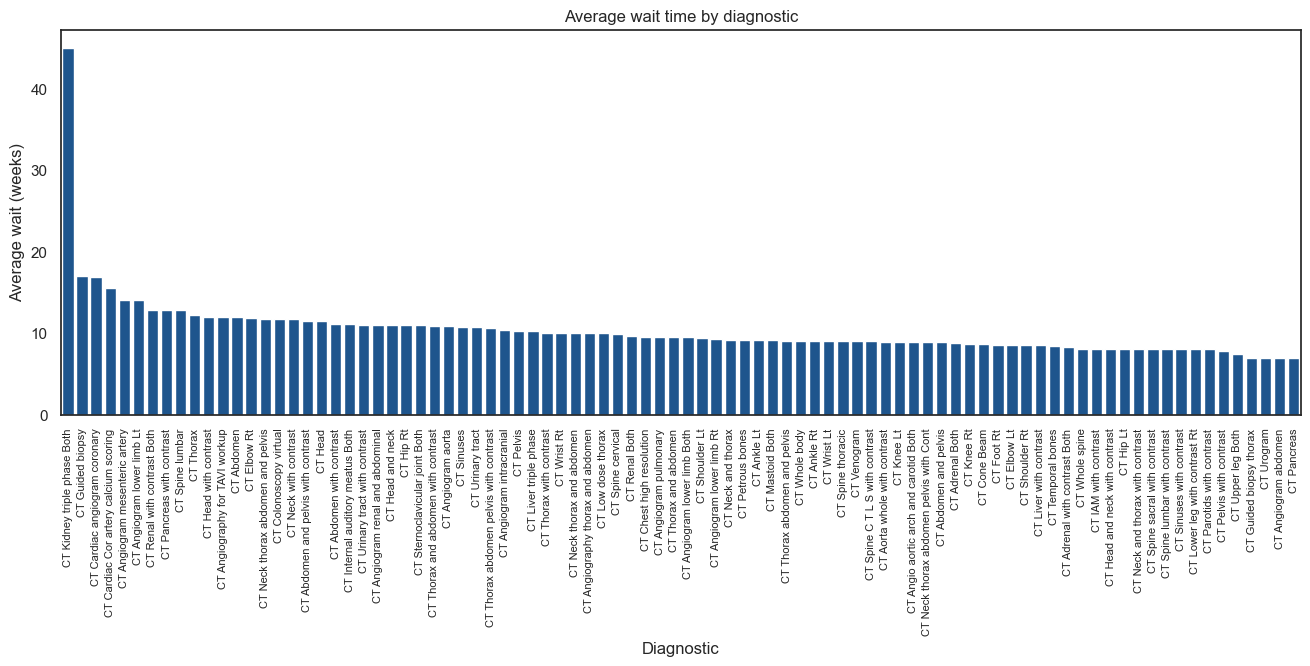

In [137]:
barplot_(wait_times_by_desc_breach, x='diagnostic_description', y='average_wait_time',
         title = 'Average wait time by diagnostic',
         xlabel = 'Diagnostic',
         ylabel = 'Average wait (weeks)',
         containers = False,
         figwidth = 16
         )
# rotate text on tick marks
plt.xticks(rotation = 90, fontsize=8);

### Summary

- In total there are 7339 patients on the waiting list for CT scans.  Of these, CT cardiac makes up 6.5%. 
- In total there are 2222 breaches, which is 30% of the waiting list. 15% of all breaches are waiting for CT cardiac scans.
- 68% of patients waiting for CT cardiac scans are in breach of the six week threshold.
- Average wait per patient is 5 weeks for CT scans only, 12 weeks for CT Cardiac scans, giving an overall average of 5 1/2 weeks.